In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set seed for reproducibility
np.random.seed(234)

In [3]:
# Create synthetic dataset
students = 40
study_hours = np.random.randint(1, 10, students) # 1 to 9 hours study
job_hours = np.random.randint(0, 15, students)  # 0 to 14 hours job
sleep_hours = np.random.randint(4, 9, students) # 4 to 8 hours sleep
extracurricular = np.random.randint(0, 6, students) # 0 to 5 hrs activities

# Exam score: positively influenced by study & sleep negatively by job and extra curricular activities
exam_score = (40
              +5*study_hours #strong positive
              +2*sleep_hours  # mild positive
              -3*job_hours  # strong negative
              -1*extracurricular    # mild negative
              + np.random.randint(-5,5, students)   #noise            
              )

data = pd.DataFrame({
    'Study Hours': study_hours,
    'Job Hours': job_hours,
    'Sleep Hours': sleep_hours,
    'Extracurricular Hours': extracurricular,
    'Exam Score': exam_score
})

In [4]:
# Print the dataset
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [5]:
# Computing the correlation co-eff for each data feature
corr_efficients = data.corr()
corr_efficients

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
Study Hours,1.000000,-0.136551,-0.006383,-0.114442,0.694048
Job Hours,-0.136551,1.000000,0.188992,0.209991,-0.782525
Sleep Hours,-0.006383,0.188992,1.000000,0.158029,-0.035653
Extracurricular Hours,-0.114442,0.209991,0.158029,1.000000,-0.276837
Exam Score,0.694048,-0.782525,-0.035653,-0.276837,1.000000


In [6]:
data.columns

Index(['Study Hours', 'Job Hours', 'Sleep Hours', 'Extracurricular Hours',
       'Exam Score'],
      dtype='object')

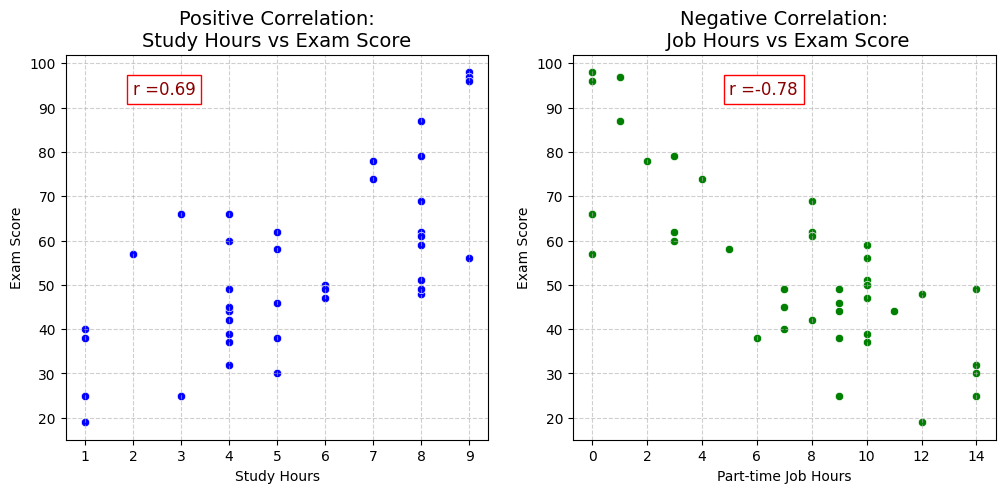

In [7]:
# Compute correlation matrix first (this defines 'corr')
corr =data[['Study Hours', 'Job Hours', 'Exam Score']].corr()

# Plot: Positive and Negative examples
plt.figure(figsize=(12,5))

# Positive correlation: Study vs Score
plt.subplot(1,2,1)
sns.scatterplot(x='Study Hours', y='Exam Score', data=data, color='blue')
plt.title('Positive Correlation:\nStudy Hours vs Exam Score', fontsize=14)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(data['Exam Score'])-5,
         f'r ={corr.loc['Study Hours', 'Exam Score']:.2f}',
         fontsize=12, color='darkred',
         bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle='--', alpha=0.6)


# Negative Correlation: Job vs Exams
plt.subplot(1,2,2)
sns.scatterplot(x='Job Hours', y='Exam Score', data=data, color='green')
plt.title('Negative Correlation:\n Job Hours vs Exam Score', fontsize=14)
plt.xlabel('Part-time Job Hours')
plt.ylabel('Exam Score')
plt.text(5, max(data['Exam Score'])-5,
        f'r ={corr.loc['Job Hours', 'Exam Score']:.2f}',
        fontsize=12, color='darkred',
        bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout
plt.show()

### **Regression**

Correlation shows whether variables move together while regression explains how much and how significantly they move together.

Regression analysis is a statistical method used to:

1. Quantify the relationship between a dependent variable (the outcome) and one or more independent variables (the predictors).

2. Predict the value of the dependent variable based on the values of the independent variables.

- Mathematically, it is about finding the best-fitting line through data points.

```python
Y = β0 +  β1x + ε

```
Y is dependent (outcome) variable (e.g., exam score)

X is independent (predictor) variable (e.g., study hours)

β₀ is intercept (value of Y when X = 0)

β₁ is slope or coefficient (how much Y changes when X increases by 1 unit) in simple terms it measure how much Y changes with X.

ε is error term (random noise not explained by X)

Regression doesn't just say "studying and scores are related" (that's correlation). It says "each hour of studying is associated with a 5-point increase in scores" – giving you actionable, quantified insights.


Lets put it in plain English

If we plot students’ study hours vs exam scores:

_We may see that as study hours increase, exam scores increase._

- Regression fits a line through the data points that best describes this upward trend.

- The slope (β₁) tells us how strong the relationship is in actual units (not just direction like correlation).

- The slope says: "For each extra hour studied, scores increase by 5 points" (precise units)

| Component | Name | What it means | Example |
|-----------|------|---------------|---------|
| **Y** | Dependent variable | The outcome you're trying to predict | Exam score |
| **X** | Independent variable | The factor you think affects the outcome | Study hours |
| **β₀** | Intercept | Starting value of Y when X = 0 | Your baseline score with zero study |
| **β₁** | Slope (coefficient) | How much Y changes for each 1-unit increase in X | "Each hour of study increases score by 5 points" |
| **ε** | Error term | Random variation not explained by X | Natural day-to-day fluctuations |

**Types of Regression**
1. Simple Linear Regression  - One independent variable

 - `Y = β0 ​+ β1​X + ε`

2. Multiple Linear Regression - Two or more independent variables
 - `Y =β0 ​+ β1​X1 ​+ β2​X2​ + ⋯ + ε`


**OLS (Ordinary Least Squares)**



OLS finds the best-fit line by minimizing the sum of squared errors, it is said to be The Engine Behind Regression.

It is computed as;

`Residual or error =(𝑌actual −𝑌predicted)**2`


- It ensures the line we draw is the one with the smallest total deviation from all the data points.

**Interpreting Regression Results**

| Column                  | Meaning                                                             | How to Explain                                        |
| ----------------------- | ------------------------------------------------------------------- | ----------------------------------------------------- |
| **Coefficient (β)**     | Average change in Y when X increases by 1 (holding others constant) | “Every extra study hour increases score by 5 points.” |
| **Std. Error**          | How uncertain our coefficient estimate is                           | Smaller = more precise                                |
| **t-Statistic**         | Coefficient ÷ Std. Error                                            | Large t = stronger evidence the effect is real        |
| **p-Value**             | Probability that the effect is due to chance                        | p < 0.05 = statistically significant                  |
| **Confidence Interval** | Range where the true coefficient likely lies                        | Narrow = more confidence                              |
| **R-squared**           | % of variation in Y explained by Xs                                 | Closer to 1 = better model                            |


In [8]:
# predictions = model.predict(X)

In [9]:
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


**Simple Linear Regression (SLR)**

We want to see how study hours affect exam scores using Simple Linear Regression.

In [10]:
data.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours,Exam Score
0,9,10,4,2,56
1,5,9,5,1,46
2,2,0,6,3,57
3,4,10,6,5,37
4,8,8,7,1,69


In [11]:
import statsmodels.api as sm

#Define variable for simple regression
X = data['Study Hours']
Y = data['Exam Score']

In [17]:
# Add intercept (constant term)
X = sm.add_constant(X)
X.head()

,const,Study Hours
0,1.0,9
1,1.0,5
2,1.0,2
3,1.0,4
4,1.0,8


In [21]:
# Fit model using OLS (ordinary Least Squares)
model = sm.OLS(Y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam Score   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     35.32
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           6.82e-07
Time:                        06:38:11   Log-Likelihood:                -161.99
No. Observations:                  40   AIC:                             328.0
Df Residuals:                      38   BIC:                             331.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.6404      5.476      4.500      

C:\Users\kanyi\AppData\Local\Temp\ipykernel_21472\3821536756.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(2, max(data['Exam Score'])-5, f'Y={model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)


<function matplotlib.pyplot.show(close=None, block=None)>

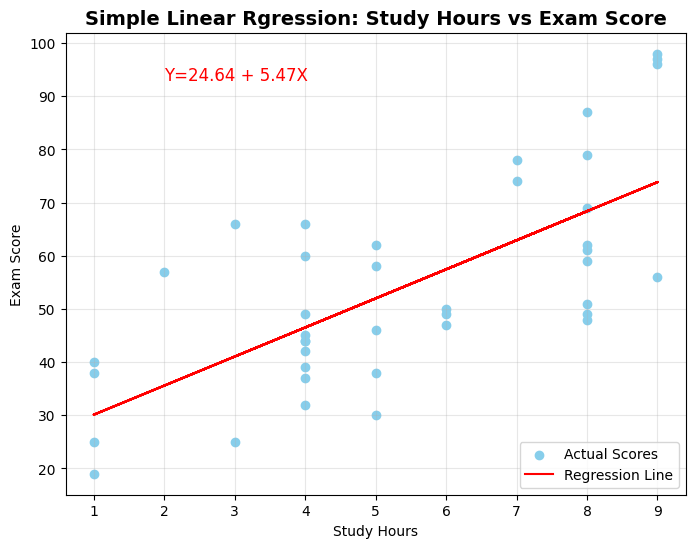

In [14]:
# Lets have the regression plot using regression line and scatter plot
plt.figure(figsize=(8,6))
plt.scatter(data['Study Hours'], data['Exam Score'], color='skyblue', label='Actual Scores')
plt.plot(data['Study Hours'], model.predict(X), color='red', label='Regression Line')

# Annotate
plt.title('Simple Linear Rgression: Study Hours vs Exam Score', fontsize=14, weight='bold')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.text(2, max(data['Exam Score'])-5, f'Y={model.params[0]:.2f} + {model.params[1]:.2f}X', color='red', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show



This is our equation;
`Exam Score = 24.6404 + 5.4672 * Study_Hours`

`24.6404` -  This is the intercept (constant term).
It means that when a student studies 0 hours, their expected exam score is about 24.64 points.

`5.4672` -  This is the slope coefficient for Study Hours.
It means for every additional 1 hour of study, the student’s exam score is expected to increase by about 5.47 points, on average.

| Statistic                               | Meaning                                                       | Interpretation                                                                                                        |                                 |                                                                                                       |
| --------------------------------------- | ------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- | ------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **Dep. Variable: Exam Score**           | The outcome we’re trying to predict                           | Exam performance of students                                                                                          |                                 |                                                                                                       |
| **Model: OLS (Ordinary Least Squares)** | The estimation technique                                      | Standard linear regression method minimizing squared errors                                                           |                                 |                                                                                                       |
| **R-squared = 0.482**                   | Proportion of variance in Exam Score explained by Study Hours | About **48.2% of the variation** in exam scores is explained by study hours alone — a moderate to strong relationship |                                 |                                                                                                       |
| **Adj. R-squared = 0.468**              | Adjusted version accounting for number of predictors          | Very close to R² since we have only one predictor — confirms reliability                                              |                                 |                                                                                                       |
| **F-statistic = 35.32**                 | Tests if the model as a whole is statistically significant    | High F-value → model is statistically significant                                                                     |                                 |                                                                                                       |
| **Prob (F-statistic) = 6.82e-07**       | p-value of the overall model                                  | **p < 0.001**, so the model is highly significant (rejects null hypothesis that slope = 0)                            |                                 |                                                                                                       |
| **const = 24.6404**                     | Intercept                                                     | Predicted score when Study Hours = 0                                                                                  |                                 |                                                                                                       |
| **Study Hours = 5.4672**                | Coefficient (slope)                                           | For each extra hour of study, exam score increases by ~5.47                                                           |                                 |                                                                                                       |
| **t = 5.943, P>                         | t                                                             | = 0.000**                                                                                                             | Significance test for the slope | Very small p-value → slope is **statistically significant** (Study Hours truly influences Exam Score) |
| **[0.025, 0.975] = [3.605, 7.330]**     | 95% confidence interval for the slope                         | We are 95% confident the true slope is between **3.61 and 7.33**, showing positive effect                             |                                 |                                                                                                       |
| **Durbin-Watson = 1.738**               | Checks for autocorrelation in residuals                       | Close to 2 → No serious autocorrelation problem                                                                       |                                 |                                                                                                       |
| **Omnibus, JB, Skew, Kurtosis**         | Normality tests of residuals                                  | Values suggest residuals are approximately normal (no strong deviation)                                               |                                 |                                                                                                       |


To summarize our result, we would say that;

1. There is a strong, positive, and statistically significant relationship between how long students study and their exam performance.

2. Study Hours alone explains nearly half of the variability in scores.

The regression line gives us a predictive model or equation.

`Predicted_Exam_Score
=24.64 + 5.47 * Study_Hours`
Predicted Exam Score=24.64+5.47×Study Hours

- The **p-value < 0.001** confirms that the relationship is not due to chance.

**Lets Evaluate Our Model**

In [ ]:
# Lets evaluate our model
predictions = model.predict(X)
predictions

`Residual(e) ​= Y(actual)​ ​− Y(predicted)**2`

In [46]:
# Calculating the residual errors usig the predicted score
data['Predicted Exam Score'] = predictions
data['Squared Error'] = (data['Exam Score'] - data['Predicted Exam Score']) **2

#Show a few rows
data[['Study Hours', 'Exam Score', 'Predicted Exam Score', 'Squared Error']].head()


,Study Hours,Exam Score,Predicted Exam Score,Squared Error
0,9,56,59.646999,13.300598
1,5,46,46.678163,0.459905
2,2,57,60.885147,15.094366
3,4,37,36.958674,0.001708
4,8,69,66.894764,4.432018


Each squared error shows how much our model missed by making inaccurate prediction of larger values or lesser values.

For us to conclude that we have a good model, our error must be as small as possible- that is, the model should minimize loss.

**Do well to take note of this and their difference**
- Error term (ε): theoretical, unobservable noise in the true population model.

- Residual (e): observable difference between actual and predicted values in your sample

#### **multiple linear regression (several predictors)**

Here, our dependent variable is still Exam_Score,
but we will use multiple predictors or features

- Study Hours, Job Hours, Sleep Hours, Extracurricular Hours

In [47]:
# Define the predictors (independent variables)
X = data[['Study Hours', 'Job Hours', 'Sleep Hours', 'Extracurricular Hours']]


In [48]:
X.head()

,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours
0,9,10,4,2
1,5,9,5,1
2,2,0,6,3
3,4,10,6,5
4,8,8,7,1


In [49]:
# Add constant term (intercept)
X = sm.add_constant(X)


**What the Constant (Intercept) Represents**

- The constant (b₀) represents the predicted value of Y when all Xs = 0.

| Reason                                                       | Explanation                                                                                                                                   |
| ------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. To capture the baseline level of Y**                    | Even when all predictors are zero, Y might not be zero. For example, some students will score *something* even without studying.              |
| **2. To avoid forcing the line through the origin (0,0)**    | Without the constant, your regression line *must* pass through the origin, which is often unrealistic and can distort all other coefficients. |
| **3. To improve model fit**                                  | The intercept helps shift the regression line vertically to best fit the data. Without it, your model can have larger errors.                 |
| **4. To correctly estimate slopes**                          | If you omit the intercept, the slope estimates may become biased, because the model is trying to “force-fit” around zero.                     |
| **5. Because real-world data usually has nonzero baselines** | For example, people have some exam performance, income, or blood pressure even when explanatory variables are at 0.                           |


In [50]:
X.head()

,const,Study Hours,Job Hours,Sleep Hours,Extracurricular Hours
0,1.0,9,10,4,2
1,1.0,5,9,5,1
2,1.0,2,0,6,3
3,1.0,4,10,6,5
4,1.0,8,8,7,1


In [51]:
# Define the dependent variables
Y = data['Exam Score']
Y.head()

0    56
1    46
2    57
3    37
4    69
Name: Exam Score, dtype: int32

In [52]:
# Fit OLS regression
model = sm.OLS(Y, X).fit()

In [29]:
# Checking the estimated co-effcients
model.params


const                    44.790203
Study Hours               4.641188
Job Hours                -3.145561
Sleep Hours               1.573738
Extracurricular Hours    -0.876619
dtype: float64

`Predicted Exam Score = 44.79 + 4.64(Study Hours) − 3.15(Job Hours) + 1.57(Sleep Hours) −0.88(Extracurricular Hours)`

| Coefficient                       | Meaning                       | Interpretation                                                                                                                                                                       |
| --------------------------------- | ----------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **const = 44.79**                 | The intercept (constant term) | If a student does **0 hours** of study, job, sleep, and extracurriculars, their baseline exam score is **44.79**. It’s the model’s predicted starting point.                         |
| **Study Hours = +4.64**           | Positive relationship         | Each **additional hour of study** is expected to **increase** the exam score by about **4.64 points**, holding all other factors constant.                                           |
| **Job Hours = -3.15**             | Negative relationship         | Each **additional hour spent working a job** is expected to **decrease** exam score by about **3.15 points**, all else equal (since more job hours might reduce study time or rest). |
| **Sleep Hours = +1.57**           | Positive relationship         | Each **extra hour of sleep** increases exam score by about **1.57 points**, holding other variables constant.                                                                        |
| **Extracurricular Hours = -0.88** | Negative relationship         | Each **extra hour spent on extracurricular activities** reduces exam score by about **0.88 points**, likely because it cuts into study or rest time.                                 |


model.params gives the estimated weights the model assigns to each factor.

Together, they define the best-fitting line (or hyperplane) through your multidimensional data.

The signs (+ or -) show direction of the relationship.

The magnitudes show how strong each effect is.

**How to Interpret "Holding Other Factors Constant"**

In multiple regression, each coefficient shows the unique effect of that variable after controlling for others.

For example:

The “4.64” for Study Hours means the gain in exam score due to study time, assuming sleep, job hours, and extracurricular activities remain the same.

So this model isolates the independent impact of each variable that’s simply the power of multiple regression.

**Bringing Our Interpretation to life**

Positive Influences

 - Study Hours and Sleep Hours both improve exam scores.

Negative Influences

- Job Hours and Extracurricular Hours lower exam scores.

Insight

- This aligns with intuition — more study and sleep are beneficial, while too much work or extracurricular activity can hurt performance.

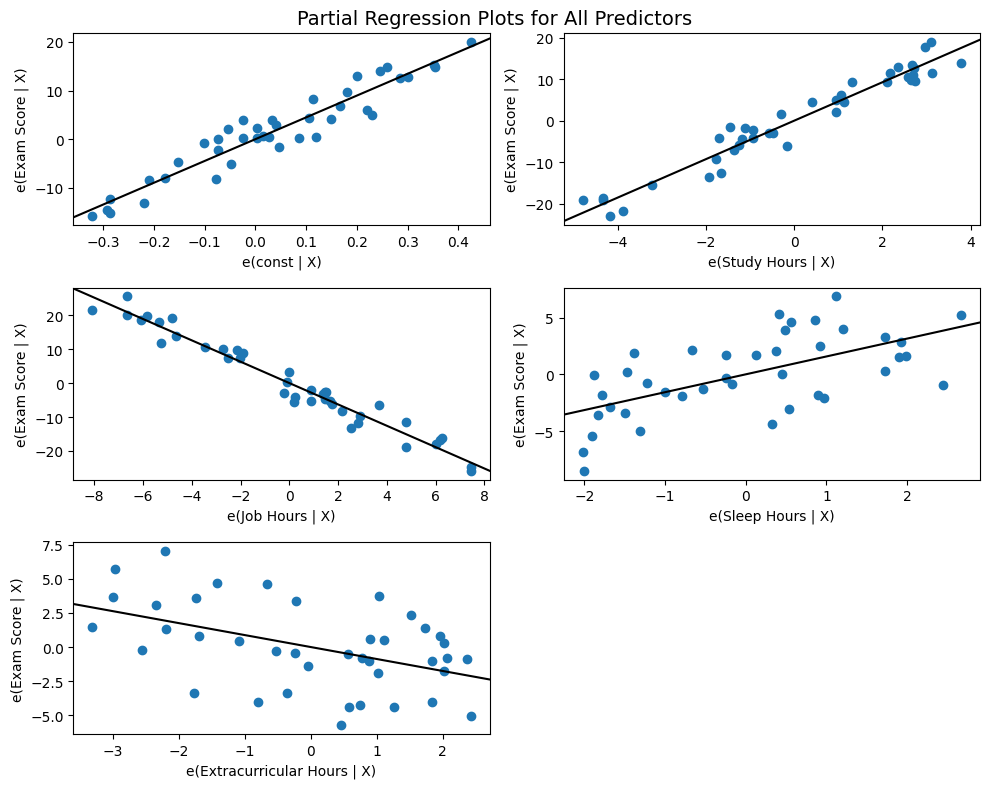

In [53]:
fig = plt.figure(figsize=(10,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.suptitle('Partial Regression Plots for All Predictors', fontsize=14)
plt.show()

In [32]:
# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam Score   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     429.2
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           3.31e-29
Time:                        07:15:22   Log-Likelihood:                -96.874
No. Observations:                  40   AIC:                             203.7
Df Residuals:                      35   BIC:                             212.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    44.79

In [37]:
#Creating a synthetic dataset

jollof_rice = 20

rice = np.random.randint(1,20, jollof_rice) # 1 to 19 cups of rice
oil = np.random.randint(0, 2, jollof_rice) # 0 to 2 cooking spoons of oil
pepper = np.random.randint(2, 8, jollof_rice) # 2 to 8 sppons of pepper
spice = np.random.randint(0, 5, jollof_rice) # 0 to 5 teaspoons of spices
okro = np.random.randint(0, 2, jollof_rice) # 1, 9  cups of carrot

# Quality positively influenced by rice, oil, rice, pepper, spice and negatively influenced by okro
quality = (20
           +5*rice  #strong positive
           +3*oil   # moderate positive
           +3*pepper    # moderate positive
           +3*spice # moderate positive
           -5*okro  #strong negative           
           )

data1 = pd.DataFrame({
    'Rice' : rice,
    'Oil': oil,
    'Pepper': pepper,
    'Spice': spice,
    'Okro': okro,
    'Quality': quality
})

In [38]:
data1.head()

,Rice,Oil,Pepper,Spice,Okro,Quality
0,3,1,2,4,1,51
1,4,0,2,0,1,41
2,11,0,7,4,1,103
3,7,1,3,1,1,65
4,4,0,4,3,1,56


In [40]:
# Lets compute the correlation co-efficients for each data feature
corr_efficients1 = data1.corr()
corr_efficients1

,Rice,Oil,Pepper,Spice,Okro,Quality
Rice,1.000000,0.321155,0.179360,0.065666,-0.189184,0.967667
Oil,0.321155,1.000000,0.267026,-0.151728,0.256776,0.346734
Pepper,0.179360,0.267026,1.000000,0.088397,0.182842,0.375542
Spice,0.065666,-0.151728,0.088397,1.000000,0.120422,0.206165
Okro,-0.189184,0.256776,0.182842,0.120422,1.000000,-0.179795
Quality,0.967667,0.346734,0.375542,0.206165,-0.179795,1.000000


In [41]:
#Checking the columns
data1.columns

Index(['Rice', 'Oil', 'Pepper', 'Spice', 'Okro', 'Quality'], dtype='object')

In [42]:
# Lets plot the relationship on a scatterplot
corr1 = data1[['Rice', 'Oil', 'Pepper', 'Spice']].corr()

In [ ]:
# Positive and Negative examples
fig = plt.figure(figsize=(12,6))

# Positive Correlation: 'O vs 'Quality'
plt.subplot(1,2,1)
sns.scatterplot(x='Rice', y='Quality', data=data1, color='blue')
plt.title('Positive Correlation:\nRice vs Quality')
plt.xlabel()
plt.ylabel()
plt.text(3, max(data['Rice'])5,
         f'r={corr.loc['Rice', 'Quality']:.2f}',
        fontsize=12, color='darkred',
        bbox=dict(facecolor='white', edgecolor='red'))
plt.grid(True, linestyle='--', alpha=0.3)



#Negative Correlation : Rice vs Quality
plt.show

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1768538584.py, line 10)